## Preliminary study of the REF 2021 submissions data

In [1]:
import sys
import pandas as pd
import importlib

# set the path to the source directory
sys.path.append('../src/')
import read_write as rw
import visualisations as vis
import codebook as cb

# set to True to print details of the processing
verbose = True

## Explore the `Outputs` table

Read ../data/raw/extracted/Outputs.csv
Preprocessed to 
- replace missing values with 'Not specified - PP ADDED'

Records      : 185354
Institutions : 158
Output types : 21
Panels       : 4
UOA          : 35

All records
-----------
Output type name
                                      Records  Records (%)
Output type name                                          
Journal article                        154826    83.529894
Authored book                           11801     6.366736
Chapter in book                          9475     5.111840
Conference contribution                  2272     1.225763
Edited book                              2135     1.151850
Other                                    1146     0.618276
Exhibition                                751     0.405171
Research report for external body         431     0.232528
Composition                               430     0.231989
Working paper                             390     0.210408
Artefact                                  

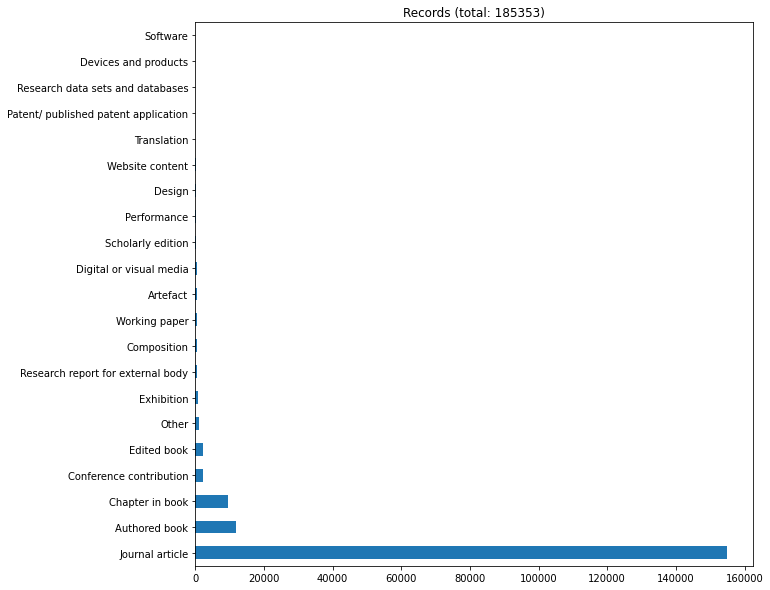


Records in categories
['Research data sets and databases', 'Devices and products', 'Patent/ published patent application', 'Software']

Output type name
                                      Records  Records (%)
Output type name                                          
Patent/ published patent application       37    39.784946
Research data sets and databases           31    33.333333
Devices and products                       14    15.053763
Software                                   11    11.827957


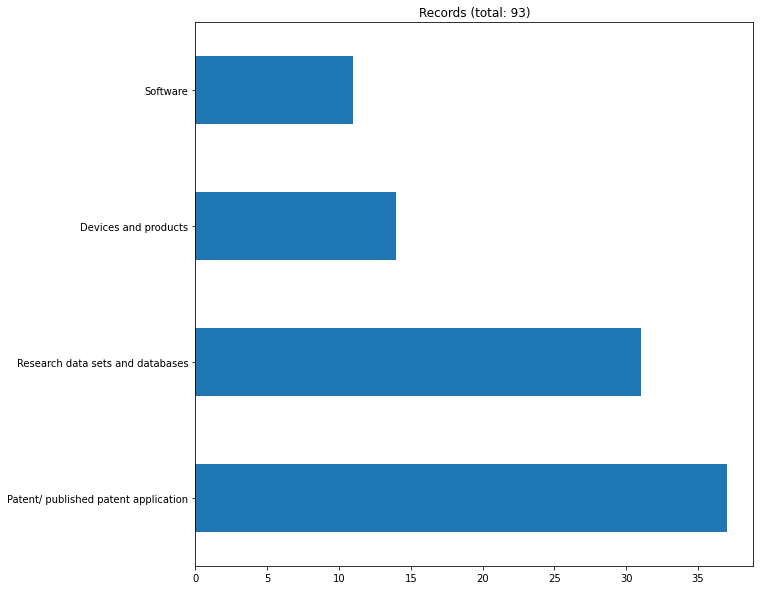

                                                               Main panel name                       Unit of assessment name                                                                                                              Title
Institution name                                                                                                                                                                                                                               
University of Ulster                                       Arts and humanities  Art and Design: History, Practice and Theory                                                                                                    axial3d Insight
Leeds Beckett University                                   Arts and humanities  Art and Design: History, Practice and Theory                                                                                                               CAGD
University College London               

In [2]:
importlib.reload(rw)
importlib.reload(cb)
importlib.reload(vis)

sheet_name = "Outputs"
fname = f"{rw.RAW_EXTRACTED_PATH}{sheet_name}.csv"
dset = pd.read_csv(fname, index_col=None, dtype={0: str})

# pre-processing
# --------------
dset = dset.fillna(cb.VALUE_ADDED_NOT_SPECIFIED)
if verbose:
    print(f"Read {fname}")
    print(f"Preprocessed to ")
    print(f"- replace missing values with '{cb.VALUE_ADDED_NOT_SPECIFIED}'")

# assign names where we only have codes
# -------------------------------------
dset[cb.COL_PANEL_NAME] = dset[cb.COL_PANEL_CODE].map(cb.PANEL_NAMES)
dset[cb.COL_OUTPUT_TYPE_NAME] = dset[cb.COL_OUTPUT_TYPE_CODE].map(cb.OUTPUT_TYPE_NAMES)

# print overall statistics
# ------------------------
print()
print(f"Records      : {dset.shape[0]}")
print(f"Institutions : {dset[cb.COL_INST_NAME].nunique()}")
print(f"Output types : {dset[cb.COL_OUTPUT_TYPE_NAME].nunique()}")
print(f"Panels       : {dset[cb.COL_PANEL_NAME].nunique()}")
print(f"UOA          : {dset[cb.COL_UOA_NAME].nunique()}")

# print and plot counts for all output types
# ------------------------------------------
print("\nAll records")
print("-----------")
vis.calculate_and_visualise_counts(dset, 
                                   cb.COL_OUTPUT_TYPE_NAME,
                                   do_print=True,
                                   do_plot="count")

# print and plot counts for outputs that should/could be directly linked to software
# ----------------------------------------------------------------------------------
outputs_linked = ["Research data sets and databases",
                  "Devices and products",
                  "Patent/ published patent application",    
                  "Software"]
print(f"\nRecords in categories\n{outputs_linked}\n")
vis.calculate_and_visualise_counts(dset[dset[cb.COL_OUTPUT_TYPE_NAME].isin(outputs_linked)], 
                                   cb.COL_OUTPUT_TYPE_NAME,
                                   do_print=True,
                                   do_plot="count")

# print details about the "Software" outputs
# ------------------------------------------
target_output_type = "Software"
columns_to_print = [cb.COL_INST_NAME, 
                    cb.COL_PANEL_NAME,
                    cb.COL_UOA_NAME,
                    cb.COL_OUTPUT_TITLE]
print(dset.loc[dset[cb.COL_OUTPUT_TYPE_NAME] == target_output_type,
               columns_to_print].set_index(cb.COL_INST_NAME).to_string())

## Explore the `ResearchGroups` table

In [3]:
sheet_name = "ResearchGroups"

fname = f"{rw.RAW_EXTRACTED_PATH}{sheet_name}.csv"
dset = pd.read_csv(fname, index_col=None, dtype={0: str})

# fill missing values
dset = dset.fillna(cb.VALUE_ADDED_NOT_SPECIFIED)

if verbose:
    print(f"Read {fname}")
    print(f"Preprocessed to ")
    print(f"- replace missing values with {cb.VALUE_ADDED_NOT_SPECIFIED}")

# assign the panel names
dset[cb.COL_PANEL_NAME] = dset[cb.COL_PANEL_CODE].map(cb.PANEL_NAMES)

# some info about the data
print()
print(f"Records      : {dset.shape[0]}")
print(f"Institutions : {dset[cb.COL_INST_NAME].nunique()}")
print(f"RGs          : {dset[cb.COL_RG_NAME].nunique()}")
print(f"RG types     : {dset[cb.COL_RG_CODE].nunique()}")
print(f"Panels       : {dset[cb.COL_PANEL_NAME].nunique()}")
print(f"UOA          : {dset[cb.COL_UOA_NAME].nunique()}")

print()
print("Submissions by panel split by UOA")
print("---------------------------------")
for key, value in cb.PANEL_NAMES.items():
    print(f"\nPanel {key} : {value}")
    dset_stats = dset[dset[cb.COL_PANEL_CODE] == key]\
        .value_counts(cb.COL_UOA_NAME).to_frame(name='Submissions')
    print(dset_stats.to_string())

Read ../data/raw/extracted/ResearchGroups.csv
Preprocessed to 
- replace missing values with Not specified - PP ADDED

Records      : 2036
Institutions : 83
RGs          : 1788
RG types     : 32
Panels       : 4
UOA          : 34

Submissions by panel split by UOA
---------------------------------

Panel A : Medicine, health and life sciences
                                                            Submissions
Unit of assessment name                                                
Allied Health Professions, Dentistry, Nursing and Pharmacy          214
Psychology, Psychiatry and Neuroscience                             119
Biological Sciences                                                 105
Clinical Medicine                                                    95
Public Health, Health Services and Primary Care                      57
Agriculture, Food and Veterinary Sciences                            41

Panel B : Physical sciences, engineering and mathematics
                     